In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf

#### Reading file

In [2]:
dataset = pd.read_csv('training-ds.csv', encoding='utf-8')
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [3]:
dataset[:10]

,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,3G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Media,Masculino,03-Jun,Bajo
1,3G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Femenino,01-Mar,Moderado
2,3G,Si,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar,Bajo
3,3G,Si,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
4,4G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Buena,Masculino,01-Mar,Alto
5,3G,No,Escuela,No,Público,Nov-15,Smartphone,Compra Megas,Media,Masculino,0,Bajo
6,4G,Si,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
7,3G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
8,4G,No,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar,Alto
9,4G,No,Escuela,Si,Público,16-20,Smartphone,Wifi,Media,Masculino,01-Mar,Moderado


In [4]:
#dummies = pd.get_dummies(dataset['Tipo de Red'], drop_first=True)  
# drop_first se usa para eliminar una columna (categoria), ya que si no corresponde a las otras automaticamente es esa.
# reduces una columan innecesaria
dataset_one_hot_encoded = pd.get_dummies(dataset)  
dataset_one_hot_encoded

,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,Vive en Ciudad_Si,...,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun,Nivel de Adaptación_Alto,Nivel de Adaptación_Bajo,Nivel de Adaptación_Moderado
0,0,1,0,0,1,0,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
1,0,1,0,1,0,0,1,0,0,1,...,0,1,1,0,0,1,0,0,0,1
2,0,1,0,0,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
3,0,1,0,0,1,0,1,0,0,1,...,0,1,0,1,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,0,1,0,1,0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
960,0,1,0,1,0,0,1,0,0,1,...,0,1,1,0,0,1,0,0,0,1
961,0,0,1,1,0,0,0,1,0,1,...,0,1,0,1,1,0,0,0,1,0
962,0,1,0,1,0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


#### Divide datset into x and y:

In [6]:
X = dataset_one_hot_encoded.iloc[:,:31]
X

,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,Vive en Ciudad_Si,...,Tipo de Internet_Compra Megas,Tipo de Internet_Wifi,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun
0,0,1,0,0,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
1,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
2,0,1,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
3,0,1,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0
4,0,0,1,0,1,0,0,1,0,1,...,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,0,1,0,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,1,0
960,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
961,0,0,1,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,1,0,0
962,0,1,0,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,1,0


In [7]:
y = dataset_one_hot_encoded.iloc[:,31:]
y

,Nivel de Adaptación_Alto,Nivel de Adaptación_Bajo,Nivel de Adaptación_Moderado
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
959,0,0,1
960,0,0,1
961,0,1,0
962,0,0,1


#### Divide dataset into training and testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(771, 31) (771, 3)
(193, 31) (193, 3)


#### Train the network:

In [9]:
model = tf.keras.Sequential([
      #tf.keras.layers.Flatten(input_shape=(31)),
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(3)
    ])

In [16]:
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
#from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
def graph_loss_vs_epochs(history, save_image_filename, title):
    training_loss = history.history['loss']
    test_loss = history.history['val_loss'] #[10 9 8 5 6 7] 3

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1) #[1 2 3 4 5 6]

    # Visualize loss history
    plt.title(title)
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.axvline(x = epoch_count[test_loss.index(min(test_loss))], color = 'c', linestyle="dotted")
    plt.savefig(save_image_filename)
    plt.show()
    
def save_history(filename, model):
    # ejemplo de filename:'history1.npy'
    np.save(filename,model.history.history)
    
def load_history(filename):
    history=np.load(filename,allow_pickle='TRUE').item()
    return history

Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.55276, saving model to model_1
INFO:tensorflow:Assets written to: model_1\assets
13/13 - 2s - loss: 0.3961 - accuracy: 0.8521 - val_loss: 0.5528 - val_accuracy: 0.7513 - 2s/epoch - 135ms/step
Epoch 2/1000

Epoch 2: val_loss did not improve from 0.55276
13/13 - 0s - loss: 0.3962 - accuracy: 0.8521 - val_loss: 0.5539 - val_accuracy: 0.7461 - 97ms/epoch - 7ms/step
Epoch 3/1000

Epoch 3: val_loss did not improve from 0.55276
13/13 - 0s - loss: 0.3955 - accuracy: 0.8534 - val_loss: 0.5664 - val_accuracy: 0.7565 - 92ms/epoch - 7ms/step
Epoch 4/1000

Epoch 4: val_loss did not improve from 0.55276
13/13 - 0s - loss: 0.3985 - accuracy: 0.8547 - val_loss: 0.5591 - val_accuracy: 0.7565 - 91ms/epoch - 7ms/step
Epoch 5/1000

Epoch 5: val_loss did not improve from 0.55276
13/13 - 0s - loss: 0.3987 - accuracy: 0.8521 - val_loss: 0.5623 - val_accuracy: 0.7565 - 93ms/epoch - 7ms/step
Epoch 6/1000

Epoch 6: val_loss did not improve from 0.55276
13/1

13/13 - 0s - loss: 0.3898 - accuracy: 0.8651 - val_loss: 0.5571 - val_accuracy: 0.7668 - 99ms/epoch - 8ms/step
Epoch 47/1000

Epoch 47: val_loss did not improve from 0.54914
13/13 - 0s - loss: 0.3892 - accuracy: 0.8599 - val_loss: 0.5549 - val_accuracy: 0.7513 - 100ms/epoch - 8ms/step
Epoch 48/1000

Epoch 48: val_loss did not improve from 0.54914
13/13 - 0s - loss: 0.3884 - accuracy: 0.8560 - val_loss: 0.5593 - val_accuracy: 0.7565 - 97ms/epoch - 7ms/step
Epoch 49/1000

Epoch 49: val_loss did not improve from 0.54914
13/13 - 0s - loss: 0.3885 - accuracy: 0.8586 - val_loss: 0.5574 - val_accuracy: 0.7565 - 96ms/epoch - 7ms/step
Epoch 50/1000

Epoch 50: val_loss did not improve from 0.54914
13/13 - 0s - loss: 0.3885 - accuracy: 0.8586 - val_loss: 0.5595 - val_accuracy: 0.7513 - 100ms/epoch - 8ms/step
Epoch 51/1000

Epoch 51: val_loss did not improve from 0.54914
13/13 - 0s - loss: 0.3889 - accuracy: 0.8573 - val_loss: 0.5547 - val_accuracy: 0.7513 - 96ms/epoch - 7ms/step
Epoch 52/1000

Ep

Epoch 92/1000

Epoch 92: val_loss did not improve from 0.54491
13/13 - 0s - loss: 0.3817 - accuracy: 0.8638 - val_loss: 0.5596 - val_accuracy: 0.7306 - 100ms/epoch - 8ms/step
Epoch 93/1000

Epoch 93: val_loss did not improve from 0.54491
13/13 - 0s - loss: 0.3847 - accuracy: 0.8534 - val_loss: 0.5585 - val_accuracy: 0.7461 - 100ms/epoch - 8ms/step
Epoch 94/1000

Epoch 94: val_loss did not improve from 0.54491
13/13 - 0s - loss: 0.3833 - accuracy: 0.8599 - val_loss: 0.5525 - val_accuracy: 0.7565 - 98ms/epoch - 8ms/step
Epoch 95/1000

Epoch 95: val_loss did not improve from 0.54491
13/13 - 0s - loss: 0.3813 - accuracy: 0.8612 - val_loss: 0.5520 - val_accuracy: 0.7565 - 100ms/epoch - 8ms/step
Epoch 96/1000

Epoch 96: val_loss did not improve from 0.54491
13/13 - 0s - loss: 0.3813 - accuracy: 0.8612 - val_loss: 0.5474 - val_accuracy: 0.7513 - 98ms/epoch - 8ms/step
Epoch 97/1000

Epoch 97: val_loss improved from 0.54491 to 0.54280, saving model to model_1
INFO:tensorflow:Assets written to: 

13/13 - 0s - loss: 0.3759 - accuracy: 0.8651 - val_loss: 0.5478 - val_accuracy: 0.7565 - 96ms/epoch - 7ms/step
Epoch 138/1000

Epoch 138: val_loss did not improve from 0.53920
13/13 - 0s - loss: 0.3753 - accuracy: 0.8651 - val_loss: 0.5494 - val_accuracy: 0.7565 - 95ms/epoch - 7ms/step
Epoch 139/1000

Epoch 139: val_loss did not improve from 0.53920
13/13 - 0s - loss: 0.3751 - accuracy: 0.8612 - val_loss: 0.5483 - val_accuracy: 0.7565 - 95ms/epoch - 7ms/step
Epoch 140/1000

Epoch 140: val_loss did not improve from 0.53920
13/13 - 0s - loss: 0.3745 - accuracy: 0.8638 - val_loss: 0.5469 - val_accuracy: 0.7513 - 97ms/epoch - 7ms/step
Epoch 141/1000

Epoch 141: val_loss did not improve from 0.53920
13/13 - 0s - loss: 0.3746 - accuracy: 0.8612 - val_loss: 0.5433 - val_accuracy: 0.7565 - 99ms/epoch - 8ms/step
Epoch 142/1000

Epoch 142: val_loss did not improve from 0.53920
13/13 - 0s - loss: 0.3748 - accuracy: 0.8573 - val_loss: 0.5475 - val_accuracy: 0.7565 - 107ms/epoch - 8ms/step
Epoch 14

Epoch 184/1000

Epoch 184: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3694 - accuracy: 0.8651 - val_loss: 0.5533 - val_accuracy: 0.7565 - 94ms/epoch - 7ms/step
Epoch 185/1000

Epoch 185: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3700 - accuracy: 0.8625 - val_loss: 0.5410 - val_accuracy: 0.7513 - 104ms/epoch - 8ms/step
Epoch 186/1000

Epoch 186: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3696 - accuracy: 0.8625 - val_loss: 0.5442 - val_accuracy: 0.7617 - 97ms/epoch - 7ms/step
Epoch 187/1000

Epoch 187: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3684 - accuracy: 0.8690 - val_loss: 0.5502 - val_accuracy: 0.7461 - 96ms/epoch - 7ms/step
Epoch 188/1000

Epoch 188: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3705 - accuracy: 0.8612 - val_loss: 0.5494 - val_accuracy: 0.7513 - 89ms/epoch - 7ms/step
Epoch 189/1000

Epoch 189: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3699 - accuracy: 0.8664 - val_los

Epoch 231/1000

Epoch 231: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3633 - accuracy: 0.8664 - val_loss: 0.5512 - val_accuracy: 0.7617 - 92ms/epoch - 7ms/step
Epoch 232/1000

Epoch 232: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3645 - accuracy: 0.8651 - val_loss: 0.5449 - val_accuracy: 0.7617 - 94ms/epoch - 7ms/step
Epoch 233/1000

Epoch 233: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3631 - accuracy: 0.8677 - val_loss: 0.5472 - val_accuracy: 0.7668 - 89ms/epoch - 7ms/step
Epoch 234/1000

Epoch 234: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3632 - accuracy: 0.8703 - val_loss: 0.5429 - val_accuracy: 0.7513 - 97ms/epoch - 7ms/step
Epoch 235/1000

Epoch 235: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3630 - accuracy: 0.8651 - val_loss: 0.5428 - val_accuracy: 0.7565 - 100ms/epoch - 8ms/step
Epoch 236/1000

Epoch 236: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3618 - accuracy: 0.8651 - val_los

Epoch 278/1000

Epoch 278: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3569 - accuracy: 0.8690 - val_loss: 0.5437 - val_accuracy: 0.7617 - 97ms/epoch - 7ms/step
Epoch 279/1000

Epoch 279: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3566 - accuracy: 0.8677 - val_loss: 0.5449 - val_accuracy: 0.7668 - 99ms/epoch - 8ms/step
Epoch 280/1000

Epoch 280: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3561 - accuracy: 0.8703 - val_loss: 0.5404 - val_accuracy: 0.7617 - 101ms/epoch - 8ms/step
Epoch 281/1000

Epoch 281: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3562 - accuracy: 0.8677 - val_loss: 0.5429 - val_accuracy: 0.7617 - 99ms/epoch - 8ms/step
Epoch 282/1000

Epoch 282: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3557 - accuracy: 0.8677 - val_loss: 0.5430 - val_accuracy: 0.7617 - 101ms/epoch - 8ms/step
Epoch 283/1000

Epoch 283: val_loss did not improve from 0.53634
13/13 - 0s - loss: 0.3559 - accuracy: 0.8677 - val_lo


Epoch 324: val_loss did not improve from 0.53423
13/13 - 0s - loss: 0.3501 - accuracy: 0.8729 - val_loss: 0.5542 - val_accuracy: 0.7565 - 88ms/epoch - 7ms/step
Epoch 325/1000

Epoch 325: val_loss did not improve from 0.53423
13/13 - 0s - loss: 0.3523 - accuracy: 0.8690 - val_loss: 0.5430 - val_accuracy: 0.7668 - 88ms/epoch - 7ms/step
Epoch 326/1000

Epoch 326: val_loss did not improve from 0.53423
13/13 - 0s - loss: 0.3506 - accuracy: 0.8742 - val_loss: 0.5399 - val_accuracy: 0.7617 - 88ms/epoch - 7ms/step
Epoch 327/1000

Epoch 327: val_loss did not improve from 0.53423
13/13 - 0s - loss: 0.3497 - accuracy: 0.8703 - val_loss: 0.5387 - val_accuracy: 0.7617 - 88ms/epoch - 7ms/step
Epoch 328/1000

Epoch 328: val_loss did not improve from 0.53423
13/13 - 0s - loss: 0.3497 - accuracy: 0.8677 - val_loss: 0.5423 - val_accuracy: 0.7720 - 91ms/epoch - 7ms/step
Epoch 329/1000

Epoch 329: val_loss did not improve from 0.53423
13/13 - 0s - loss: 0.3510 - accuracy: 0.8729 - val_loss: 0.5432 - val_

Epoch 371/1000

Epoch 371: val_loss did not improve from 0.53423
13/13 - 0s - loss: 0.3483 - accuracy: 0.8677 - val_loss: 0.5362 - val_accuracy: 0.7513 - 96ms/epoch - 7ms/step
Epoch 372/1000

Epoch 372: val_loss improved from 0.53423 to 0.53030, saving model to model_1
INFO:tensorflow:Assets written to: model_1\assets
13/13 - 1s - loss: 0.3461 - accuracy: 0.8690 - val_loss: 0.5303 - val_accuracy: 0.7668 - 862ms/epoch - 66ms/step
Epoch 373/1000

Epoch 373: val_loss did not improve from 0.53030
13/13 - 0s - loss: 0.3473 - accuracy: 0.8742 - val_loss: 0.5330 - val_accuracy: 0.7720 - 96ms/epoch - 7ms/step
Epoch 374/1000

Epoch 374: val_loss did not improve from 0.53030
13/13 - 0s - loss: 0.3457 - accuracy: 0.8729 - val_loss: 0.5519 - val_accuracy: 0.7617 - 96ms/epoch - 7ms/step
Epoch 375/1000

Epoch 375: val_loss did not improve from 0.53030
13/13 - 0s - loss: 0.3486 - accuracy: 0.8716 - val_loss: 0.5304 - val_accuracy: 0.7617 - 104ms/epoch - 8ms/step
Epoch 376/1000

Epoch 376: val_loss im

Epoch 416/1000

Epoch 416: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3417 - accuracy: 0.8729 - val_loss: 0.5330 - val_accuracy: 0.7720 - 86ms/epoch - 7ms/step
Epoch 417/1000

Epoch 417: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3415 - accuracy: 0.8716 - val_loss: 0.5408 - val_accuracy: 0.7617 - 91ms/epoch - 7ms/step
Epoch 418/1000

Epoch 418: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3409 - accuracy: 0.8781 - val_loss: 0.5350 - val_accuracy: 0.7720 - 97ms/epoch - 7ms/step
Epoch 419/1000

Epoch 419: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3403 - accuracy: 0.8781 - val_loss: 0.5311 - val_accuracy: 0.7720 - 106ms/epoch - 8ms/step
Epoch 420/1000

Epoch 420: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3403 - accuracy: 0.8781 - val_loss: 0.5286 - val_accuracy: 0.7772 - 107ms/epoch - 8ms/step
Epoch 421/1000

Epoch 421: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3404 - accuracy: 0.8755 - val_lo

Epoch 463/1000

Epoch 463: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3355 - accuracy: 0.8742 - val_loss: 0.5531 - val_accuracy: 0.7617 - 96ms/epoch - 7ms/step
Epoch 464/1000

Epoch 464: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3397 - accuracy: 0.8703 - val_loss: 0.5361 - val_accuracy: 0.7617 - 88ms/epoch - 7ms/step
Epoch 465/1000

Epoch 465: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3375 - accuracy: 0.8755 - val_loss: 0.5764 - val_accuracy: 0.7565 - 108ms/epoch - 8ms/step
Epoch 466/1000

Epoch 466: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3429 - accuracy: 0.8690 - val_loss: 0.5406 - val_accuracy: 0.7668 - 88ms/epoch - 7ms/step
Epoch 467/1000

Epoch 467: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3363 - accuracy: 0.8742 - val_loss: 0.5385 - val_accuracy: 0.7668 - 88ms/epoch - 7ms/step
Epoch 468/1000

Epoch 468: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3347 - accuracy: 0.8729 - val_los

Epoch 510/1000

Epoch 510: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3309 - accuracy: 0.8768 - val_loss: 0.5353 - val_accuracy: 0.7720 - 72ms/epoch - 6ms/step
Epoch 511/1000

Epoch 511: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3305 - accuracy: 0.8781 - val_loss: 0.5521 - val_accuracy: 0.7461 - 80ms/epoch - 6ms/step
Epoch 512/1000

Epoch 512: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3375 - accuracy: 0.8625 - val_loss: 0.5607 - val_accuracy: 0.7461 - 96ms/epoch - 7ms/step
Epoch 513/1000

Epoch 513: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3376 - accuracy: 0.8716 - val_loss: 0.5473 - val_accuracy: 0.7617 - 96ms/epoch - 7ms/step
Epoch 514/1000

Epoch 514: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3310 - accuracy: 0.8807 - val_loss: 0.5366 - val_accuracy: 0.7668 - 96ms/epoch - 7ms/step
Epoch 515/1000

Epoch 515: val_loss did not improve from 0.52378
13/13 - 0s - loss: 0.3298 - accuracy: 0.8807 - val_loss


Epoch 556: val_loss did not improve from 0.52222
13/13 - 0s - loss: 0.3268 - accuracy: 0.8794 - val_loss: 0.5393 - val_accuracy: 0.7409 - 90ms/epoch - 7ms/step
Epoch 557/1000

Epoch 557: val_loss improved from 0.52222 to 0.52104, saving model to model_1
INFO:tensorflow:Assets written to: model_1\assets
13/13 - 1s - loss: 0.3300 - accuracy: 0.8794 - val_loss: 0.5210 - val_accuracy: 0.7720 - 869ms/epoch - 67ms/step
Epoch 558/1000

Epoch 558: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3300 - accuracy: 0.8768 - val_loss: 0.5275 - val_accuracy: 0.7720 - 111ms/epoch - 9ms/step
Epoch 559/1000

Epoch 559: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3272 - accuracy: 0.8781 - val_loss: 0.5284 - val_accuracy: 0.7720 - 97ms/epoch - 7ms/step
Epoch 560/1000

Epoch 560: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3259 - accuracy: 0.8833 - val_loss: 0.5314 - val_accuracy: 0.7668 - 95ms/epoch - 7ms/step
Epoch 561/1000

Epoch 561: val_loss did not improve f

13/13 - 0s - loss: 0.3224 - accuracy: 0.8833 - val_loss: 0.5446 - val_accuracy: 0.7565 - 104ms/epoch - 8ms/step
Epoch 603/1000

Epoch 603: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3259 - accuracy: 0.8807 - val_loss: 0.5349 - val_accuracy: 0.7668 - 96ms/epoch - 7ms/step
Epoch 604/1000

Epoch 604: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3220 - accuracy: 0.8820 - val_loss: 0.5367 - val_accuracy: 0.7617 - 94ms/epoch - 7ms/step
Epoch 605/1000

Epoch 605: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3237 - accuracy: 0.8807 - val_loss: 0.5307 - val_accuracy: 0.7720 - 98ms/epoch - 8ms/step
Epoch 606/1000

Epoch 606: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3223 - accuracy: 0.8833 - val_loss: 0.5472 - val_accuracy: 0.7513 - 92ms/epoch - 7ms/step
Epoch 607/1000

Epoch 607: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3266 - accuracy: 0.8716 - val_loss: 0.5426 - val_accuracy: 0.7617 - 91ms/epoch - 7ms/step
Epoch 60

Epoch 649/1000

Epoch 649: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3220 - accuracy: 0.8794 - val_loss: 0.5279 - val_accuracy: 0.7824 - 100ms/epoch - 8ms/step
Epoch 650/1000

Epoch 650: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3186 - accuracy: 0.8859 - val_loss: 0.5322 - val_accuracy: 0.7668 - 95ms/epoch - 7ms/step
Epoch 651/1000

Epoch 651: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3184 - accuracy: 0.8833 - val_loss: 0.5327 - val_accuracy: 0.7668 - 96ms/epoch - 7ms/step
Epoch 652/1000

Epoch 652: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3172 - accuracy: 0.8846 - val_loss: 0.5319 - val_accuracy: 0.7772 - 95ms/epoch - 7ms/step
Epoch 653/1000

Epoch 653: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3179 - accuracy: 0.8859 - val_loss: 0.5303 - val_accuracy: 0.7772 - 100ms/epoch - 8ms/step
Epoch 654/1000

Epoch 654: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3185 - accuracy: 0.8794 - val_lo

Epoch 696/1000

Epoch 696: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3138 - accuracy: 0.8820 - val_loss: 0.5276 - val_accuracy: 0.7824 - 95ms/epoch - 7ms/step
Epoch 697/1000

Epoch 697: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3144 - accuracy: 0.8846 - val_loss: 0.5242 - val_accuracy: 0.7824 - 88ms/epoch - 7ms/step
Epoch 698/1000

Epoch 698: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3128 - accuracy: 0.8859 - val_loss: 0.5261 - val_accuracy: 0.7617 - 105ms/epoch - 8ms/step
Epoch 699/1000

Epoch 699: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3139 - accuracy: 0.8820 - val_loss: 0.5269 - val_accuracy: 0.7617 - 90ms/epoch - 7ms/step
Epoch 700/1000

Epoch 700: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3131 - accuracy: 0.8807 - val_loss: 0.5297 - val_accuracy: 0.7824 - 92ms/epoch - 7ms/step
Epoch 701/1000

Epoch 701: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3162 - accuracy: 0.8807 - val_los

Epoch 743/1000

Epoch 743: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3104 - accuracy: 0.8859 - val_loss: 0.5249 - val_accuracy: 0.7772 - 88ms/epoch - 7ms/step
Epoch 744/1000

Epoch 744: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3093 - accuracy: 0.8833 - val_loss: 0.5344 - val_accuracy: 0.7668 - 96ms/epoch - 7ms/step
Epoch 745/1000

Epoch 745: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3111 - accuracy: 0.8846 - val_loss: 0.5375 - val_accuracy: 0.7720 - 96ms/epoch - 7ms/step
Epoch 746/1000

Epoch 746: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3124 - accuracy: 0.8859 - val_loss: 0.5444 - val_accuracy: 0.7461 - 96ms/epoch - 7ms/step
Epoch 747/1000

Epoch 747: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3152 - accuracy: 0.8781 - val_loss: 0.5398 - val_accuracy: 0.7668 - 96ms/epoch - 7ms/step
Epoch 748/1000

Epoch 748: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3142 - accuracy: 0.8794 - val_loss

Epoch 790/1000

Epoch 790: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3080 - accuracy: 0.8833 - val_loss: 0.5364 - val_accuracy: 0.7668 - 88ms/epoch - 7ms/step
Epoch 791/1000

Epoch 791: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3094 - accuracy: 0.8807 - val_loss: 0.5278 - val_accuracy: 0.7927 - 93ms/epoch - 7ms/step
Epoch 792/1000

Epoch 792: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3068 - accuracy: 0.8846 - val_loss: 0.5279 - val_accuracy: 0.7927 - 96ms/epoch - 7ms/step
Epoch 793/1000

Epoch 793: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3075 - accuracy: 0.8859 - val_loss: 0.5290 - val_accuracy: 0.7927 - 96ms/epoch - 7ms/step
Epoch 794/1000

Epoch 794: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3079 - accuracy: 0.8833 - val_loss: 0.5284 - val_accuracy: 0.7927 - 88ms/epoch - 7ms/step
Epoch 795/1000

Epoch 795: val_loss did not improve from 0.52104
13/13 - 0s - loss: 0.3063 - accuracy: 0.8872 - val_loss

13/13 - 0s - loss: 0.3042 - accuracy: 0.8846 - val_loss: 0.5278 - val_accuracy: 0.7876 - 96ms/epoch - 7ms/step
Epoch 836/1000

Epoch 836: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.3052 - accuracy: 0.8859 - val_loss: 0.5255 - val_accuracy: 0.7979 - 101ms/epoch - 8ms/step
Epoch 837/1000

Epoch 837: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.3040 - accuracy: 0.8846 - val_loss: 0.5232 - val_accuracy: 0.7979 - 88ms/epoch - 7ms/step
Epoch 838/1000

Epoch 838: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.3038 - accuracy: 0.8833 - val_loss: 0.5131 - val_accuracy: 0.8083 - 88ms/epoch - 7ms/step
Epoch 839/1000

Epoch 839: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.3070 - accuracy: 0.8820 - val_loss: 0.5195 - val_accuracy: 0.7927 - 96ms/epoch - 7ms/step
Epoch 840/1000

Epoch 840: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.3053 - accuracy: 0.8846 - val_loss: 0.5346 - val_accuracy: 0.7772 - 96ms/epoch - 7ms/step
Epoch 84

Epoch 882/1000

Epoch 882: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.3064 - accuracy: 0.8833 - val_loss: 0.5321 - val_accuracy: 0.7876 - 88ms/epoch - 7ms/step
Epoch 883/1000

Epoch 883: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.3006 - accuracy: 0.8846 - val_loss: 0.5293 - val_accuracy: 0.7927 - 96ms/epoch - 7ms/step
Epoch 884/1000

Epoch 884: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.3009 - accuracy: 0.8872 - val_loss: 0.5295 - val_accuracy: 0.7927 - 104ms/epoch - 8ms/step
Epoch 885/1000

Epoch 885: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.3004 - accuracy: 0.8885 - val_loss: 0.5280 - val_accuracy: 0.7927 - 96ms/epoch - 7ms/step
Epoch 886/1000

Epoch 886: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.2996 - accuracy: 0.8859 - val_loss: 0.5330 - val_accuracy: 0.7927 - 96ms/epoch - 7ms/step
Epoch 887/1000

Epoch 887: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.3004 - accuracy: 0.8872 - val_los

Epoch 929/1000

Epoch 929: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.2973 - accuracy: 0.8911 - val_loss: 0.5264 - val_accuracy: 0.7927 - 99ms/epoch - 8ms/step
Epoch 930/1000

Epoch 930: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.2979 - accuracy: 0.8885 - val_loss: 0.5275 - val_accuracy: 0.7927 - 97ms/epoch - 7ms/step
Epoch 931/1000

Epoch 931: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.2988 - accuracy: 0.8885 - val_loss: 0.5249 - val_accuracy: 0.7927 - 100ms/epoch - 8ms/step
Epoch 932/1000

Epoch 932: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.2986 - accuracy: 0.8911 - val_loss: 0.5206 - val_accuracy: 0.7979 - 97ms/epoch - 7ms/step
Epoch 933/1000

Epoch 933: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.2969 - accuracy: 0.8911 - val_loss: 0.5229 - val_accuracy: 0.7979 - 89ms/epoch - 7ms/step
Epoch 934/1000

Epoch 934: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.2968 - accuracy: 0.8911 - val_los

Epoch 976/1000

Epoch 976: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.2957 - accuracy: 0.8872 - val_loss: 0.5209 - val_accuracy: 0.7876 - 96ms/epoch - 7ms/step
Epoch 977/1000

Epoch 977: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.2946 - accuracy: 0.8872 - val_loss: 0.5282 - val_accuracy: 0.7927 - 96ms/epoch - 7ms/step
Epoch 978/1000

Epoch 978: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.2956 - accuracy: 0.8911 - val_loss: 0.5217 - val_accuracy: 0.7927 - 104ms/epoch - 8ms/step
Epoch 979/1000

Epoch 979: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.2951 - accuracy: 0.8885 - val_loss: 0.5348 - val_accuracy: 0.7668 - 96ms/epoch - 7ms/step
Epoch 980/1000

Epoch 980: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.2981 - accuracy: 0.8833 - val_loss: 0.5298 - val_accuracy: 0.7824 - 100ms/epoch - 8ms/step
Epoch 981/1000

Epoch 981: val_loss did not improve from 0.50469
13/13 - 0s - loss: 0.2947 - accuracy: 0.8846 - val_lo

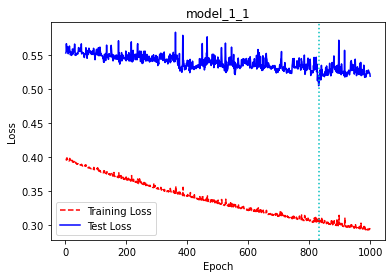

In [71]:
learning_rate = 0.01
batch_size = 64

loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model.compile(optimizer, loss_fn, metrics)
plot_model(model, to_file='model_images/model_1_m.png', show_shapes=True)
checkpoint = ModelCheckpoint('model_1', monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 1000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, 'loss_vs_epochs_images/model_1_1_le.png', 'model_1_1')
save_history('history_model_1_1', model)

In [26]:
print('\nEvaluating:')
(test_loss, test_accuracy) = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_accuracy * 100:>0.1f}%, test loss: {test_loss:>8f}')


Evaluating:
7/7 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.7461

Test accuracy: 74.6%, test loss: 0.552894


In [69]:
print(X_test.shape)
print(X_test[7:8])
print("y")
print(y_test[7:8])

(193, 31)
     Tipo de Red_2G  Tipo de Red_3G  Tipo de Red_4G  \
267               0               0               1   

     Estudiante de Tecnología_No  Estudiante de Tecnología_Si  \
267                            1                            0   

     Nivel de Educación_Colegio  Nivel de Educación_Escuela  \
267                           0                           0   

     Nivel de Educación_Universidad  Vive en Ciudad_No  Vive en Ciudad_Si  \
267                               1                  0                  1   

     ...  Tipo de Internet_Compra Megas  Tipo de Internet_Wifi  \
267  ...                              0                      1   

     Situación Financiera_Buena  Situación Financiera_Mala  \
267                           0                          0   

     Situación Financiera_Media  Género_Femenino  Género_Masculino  \
267                           1                0                 1   

     Duración de la Clase_0  Duración de la Clase_01-Mar  \
267    

In [70]:
from numpy import argmax
def get_label(column):
    label = y_test.columns[column]
    return label
prediction = model.predict(X_test[7:8])
print(get_label(argmax(prediction)))

Nivel de Adaptación_Moderado


#### Analyze data correlation:

In [39]:
c1 = dataset_one_hot_encoded.corr(method="pearson")["Nivel de Adaptación_Alto"]
c2 =  dataset_one_hot_encoded.corr(method="pearson")["Nivel de Adaptación_Bajo"]	
c3 =  dataset_one_hot_encoded.corr(method="pearson")["Nivel de Adaptación_Moderado"]
print("\nCorrelation with Nivel de Adaptación Alto: ")
print(c1[abs(c1)>0.2])
print("\nCorrelation with Nivel de Adaptación Bajo: ")
print(c2[abs(c2)>0.2])
print("\nCorrelation with Nivel de Adaptación Moderado: ")
print(c3[abs(c3)>0.2])


Correlation with Nivel de Adaptación Alto: 
Situación Financiera_Buena      0.389750
Situación Financiera_Media     -0.234469
Nivel de Adaptación_Alto        1.000000
Nivel de Adaptación_Bajo       -0.251933
Nivel de Adaptación_Moderado   -0.320800
Name: Nivel de Adaptación_Alto, dtype: float64

Correlation with Nivel de Adaptación Bajo: 
Vive en Ciudad_No               0.245294
Vive en Ciudad_Si              -0.245294
Tipo de Instituto_Privado      -0.298710
Tipo de Instituto_Público       0.298710
Duración de la Clase_0          0.410024
Nivel de Adaptación_Alto       -0.251933
Nivel de Adaptación_Bajo        1.000000
Nivel de Adaptación_Moderado   -0.835776
Name: Nivel de Adaptación_Bajo, dtype: float64

Correlation with Nivel de Adaptación Moderado: 
Tipo de Instituto_Privado       0.258213
Tipo de Instituto_Público      -0.258213
Duración de la Clase_0         -0.334453
Nivel de Adaptación_Alto       -0.320800
Nivel de Adaptación_Bajo       -0.835776
Nivel de Adaptación_Moderado 

In [ ]:
# situacion financiera, vive en ciudad, tipo de instituto, duracion de la clase

In [76]:
important_columns = ["Situación Financiera","Vive en Ciudad", "Tipo de Instituto", "Duración de la Clase", "Nivel de Adaptación"]
summarized_dataset = dataset[important_columns]
summarized_dataset

,Situación Financiera,Vive en Ciudad,Tipo de Instituto,Duración de la Clase,Nivel de Adaptación
0,Media,Si,Privado,03-Jun,Bajo
1,Media,Si,Privado,01-Mar,Moderado
2,Mala,Si,Privado,01-Mar,Bajo
3,Media,Si,Privado,01-Mar,Moderado
4,Buena,Si,Privado,01-Mar,Alto
...,...,...,...,...,...
959,Media,Si,Privado,01-Mar,Moderado
960,Media,Si,Privado,01-Mar,Moderado
961,Media,Si,Público,0,Bajo
962,Media,Si,Privado,01-Mar,Moderado


In [85]:
summarized_dataset_one_hot_encoded = pd.get_dummies(summarized_dataset)  
summarized_dataset_one_hot_encoded

,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Vive en Ciudad_No,Vive en Ciudad_Si,Tipo de Instituto_Privado,Tipo de Instituto_Público,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun,Nivel de Adaptación_Alto,Nivel de Adaptación_Bajo,Nivel de Adaptación_Moderado
0,0,0,1,0,1,1,0,0,0,1,0,1,0
1,0,0,1,0,1,1,0,0,1,0,0,0,1
2,0,1,0,0,1,1,0,0,1,0,0,1,0
3,0,0,1,0,1,1,0,0,1,0,0,0,1
4,1,0,0,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,0,0,1,0,1,1,0,0,1,0,0,0,1
960,0,0,1,0,1,1,0,0,1,0,0,0,1
961,0,0,1,0,1,0,1,1,0,0,0,1,0
962,0,0,1,0,1,1,0,0,1,0,0,0,1


In [87]:
X = summarized_dataset_one_hot_encoded.iloc[:,:10]
X

,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Vive en Ciudad_No,Vive en Ciudad_Si,Tipo de Instituto_Privado,Tipo de Instituto_Público,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun
0,0,0,1,0,1,1,0,0,0,1
1,0,0,1,0,1,1,0,0,1,0
2,0,1,0,0,1,1,0,0,1,0
3,0,0,1,0,1,1,0,0,1,0
4,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
959,0,0,1,0,1,1,0,0,1,0
960,0,0,1,0,1,1,0,0,1,0
961,0,0,1,0,1,0,1,1,0,0
962,0,0,1,0,1,1,0,0,1,0


In [88]:
y = summarized_dataset_one_hot_encoded.iloc[:,10:]
y

,Nivel de Adaptación_Alto,Nivel de Adaptación_Bajo,Nivel de Adaptación_Moderado
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
959,0,0,1
960,0,0,1
961,0,1,0
962,0,0,1


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(771, 10) (771, 3)
(193, 10) (193, 3)


Epoch 1/1000

Epoch 1: val_loss improved from inf to 1.09652, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 1.1327 - accuracy: 0.2088 - val_loss: 1.0965 - val_accuracy: 0.2902 - 1s/epoch - 91ms/step
Epoch 2/1000

Epoch 2: val_loss improved from 1.09652 to 1.05203, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 1.0899 - accuracy: 0.2944 - val_loss: 1.0520 - val_accuracy: 0.4560 - 365ms/epoch - 28ms/step
Epoch 3/1000

Epoch 3: val_loss improved from 1.05203 to 1.02075, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 1.0512 - accuracy: 0.4449 - val_loss: 1.0208 - val_accuracy: 0.4560 - 334ms/epoch - 26ms/step
Epoch 4/1000

Epoch 4: val_loss improved from 1.02075 to 0.99886, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 1.0239 - accuracy: 0.4449 - val_loss: 0.9989 - val_accuracy: 0.5181 - 322ms/epoch

INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.8663 - accuracy: 0.6070 - val_loss: 0.8464 - val_accuracy: 0.6114 - 425ms/epoch - 33ms/step
Epoch 34/1000

Epoch 34: val_loss improved from 0.84642 to 0.84356, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.8642 - accuracy: 0.6109 - val_loss: 0.8436 - val_accuracy: 0.6114 - 443ms/epoch - 34ms/step
Epoch 35/1000

Epoch 35: val_loss improved from 0.84356 to 0.84321, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.8624 - accuracy: 0.6109 - val_loss: 0.8432 - val_accuracy: 0.6166 - 355ms/epoch - 27ms/step
Epoch 36/1000

Epoch 36: val_loss improved from 0.84321 to 0.84281, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.8604 - accuracy: 0.6200 - val_loss: 0.8428 - val_accuracy: 0.6166 - 366ms/epoch - 28ms/step
Epoch 37/1000

Epoch 37: val_loss improved from 0.84281 to 0.8390

13/13 - 0s - loss: 0.8159 - accuracy: 0.6265 - val_loss: 0.7997 - val_accuracy: 0.6373 - 54ms/epoch - 4ms/step
Epoch 68/1000

Epoch 68: val_loss improved from 0.79618 to 0.79514, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.8154 - accuracy: 0.6265 - val_loss: 0.7951 - val_accuracy: 0.6373 - 353ms/epoch - 27ms/step
Epoch 69/1000

Epoch 69: val_loss improved from 0.79514 to 0.79502, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.8147 - accuracy: 0.6265 - val_loss: 0.7950 - val_accuracy: 0.6373 - 470ms/epoch - 36ms/step
Epoch 70/1000

Epoch 70: val_loss improved from 0.79502 to 0.79257, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.8134 - accuracy: 0.6291 - val_loss: 0.7926 - val_accuracy: 0.6373 - 353ms/epoch - 27ms/step
Epoch 71/1000

Epoch 71: val_loss did not improve from 0.79257
13/13 - 0s - loss: 0.8123 - accuracy: 0.6265 - val_loss

Epoch 106/1000

Epoch 106: val_loss improved from 0.76679 to 0.76290, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.7889 - accuracy: 0.6394 - val_loss: 0.7629 - val_accuracy: 0.6477 - 482ms/epoch - 37ms/step
Epoch 107/1000

Epoch 107: val_loss did not improve from 0.76290
13/13 - 0s - loss: 0.7888 - accuracy: 0.6420 - val_loss: 0.7638 - val_accuracy: 0.6477 - 57ms/epoch - 4ms/step
Epoch 108/1000

Epoch 108: val_loss did not improve from 0.76290
13/13 - 0s - loss: 0.7878 - accuracy: 0.6420 - val_loss: 0.7673 - val_accuracy: 0.6477 - 45ms/epoch - 3ms/step
Epoch 109/1000

Epoch 109: val_loss did not improve from 0.76290
13/13 - 0s - loss: 0.7876 - accuracy: 0.6394 - val_loss: 0.7667 - val_accuracy: 0.6477 - 48ms/epoch - 4ms/step
Epoch 110/1000

Epoch 110: val_loss did not improve from 0.76290
13/13 - 0s - loss: 0.7871 - accuracy: 0.6381 - val_loss: 0.7630 - val_accuracy: 0.6528 - 55ms/epoch - 4ms/step
Epoch 111/1000

Epoch 111: val_loss i

13/13 - 0s - loss: 0.7735 - accuracy: 0.6394 - val_loss: 0.7497 - val_accuracy: 0.6528 - 57ms/epoch - 4ms/step
Epoch 148/1000

Epoch 148: val_loss improved from 0.74568 to 0.74530, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.7731 - accuracy: 0.6394 - val_loss: 0.7453 - val_accuracy: 0.6528 - 327ms/epoch - 25ms/step
Epoch 149/1000

Epoch 149: val_loss did not improve from 0.74530
13/13 - 0s - loss: 0.7727 - accuracy: 0.6394 - val_loss: 0.7491 - val_accuracy: 0.6528 - 49ms/epoch - 4ms/step
Epoch 150/1000

Epoch 150: val_loss improved from 0.74530 to 0.74494, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.7725 - accuracy: 0.6394 - val_loss: 0.7449 - val_accuracy: 0.6528 - 324ms/epoch - 25ms/step
Epoch 151/1000

Epoch 151: val_loss did not improve from 0.74494
13/13 - 0s - loss: 0.7722 - accuracy: 0.6394 - val_loss: 0.7456 - val_accuracy: 0.6528 - 57ms/epoch - 4ms/step
Epoch 152/1000

Epo

13/13 - 0s - loss: 0.7655 - accuracy: 0.6394 - val_loss: 0.7333 - val_accuracy: 0.6528 - 52ms/epoch - 4ms/step
Epoch 190/1000

Epoch 190: val_loss did not improve from 0.73144
13/13 - 0s - loss: 0.7656 - accuracy: 0.6394 - val_loss: 0.7366 - val_accuracy: 0.6528 - 52ms/epoch - 4ms/step
Epoch 191/1000

Epoch 191: val_loss did not improve from 0.73144
13/13 - 0s - loss: 0.7651 - accuracy: 0.6394 - val_loss: 0.7361 - val_accuracy: 0.6528 - 52ms/epoch - 4ms/step
Epoch 192/1000

Epoch 192: val_loss did not improve from 0.73144
13/13 - 0s - loss: 0.7649 - accuracy: 0.6394 - val_loss: 0.7413 - val_accuracy: 0.6218 - 54ms/epoch - 4ms/step
Epoch 193/1000

Epoch 193: val_loss improved from 0.73144 to 0.73123, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.7651 - accuracy: 0.6291 - val_loss: 0.7312 - val_accuracy: 0.6528 - 357ms/epoch - 27ms/step
Epoch 194/1000

Epoch 194: val_loss did not improve from 0.73123
13/13 - 0s - loss: 0.7644 - accuracy:

Epoch 234/1000

Epoch 234: val_loss did not improve from 0.72404
13/13 - 0s - loss: 0.7603 - accuracy: 0.6394 - val_loss: 0.7252 - val_accuracy: 0.6528 - 59ms/epoch - 5ms/step
Epoch 235/1000

Epoch 235: val_loss improved from 0.72404 to 0.72291, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.7604 - accuracy: 0.6394 - val_loss: 0.7229 - val_accuracy: 0.6528 - 322ms/epoch - 25ms/step
Epoch 236/1000

Epoch 236: val_loss did not improve from 0.72291
13/13 - 0s - loss: 0.7607 - accuracy: 0.6394 - val_loss: 0.7240 - val_accuracy: 0.6528 - 56ms/epoch - 4ms/step
Epoch 237/1000

Epoch 237: val_loss did not improve from 0.72291
13/13 - 0s - loss: 0.7603 - accuracy: 0.6394 - val_loss: 0.7273 - val_accuracy: 0.6528 - 45ms/epoch - 3ms/step
Epoch 238/1000

Epoch 238: val_loss did not improve from 0.72291
13/13 - 0s - loss: 0.7599 - accuracy: 0.6394 - val_loss: 0.7305 - val_accuracy: 0.6528 - 51ms/epoch - 4ms/step
Epoch 239/1000

Epoch 239: val_loss d

13/13 - 0s - loss: 0.7578 - accuracy: 0.6342 - val_loss: 0.7302 - val_accuracy: 0.6477 - 48ms/epoch - 4ms/step
Epoch 280/1000

Epoch 280: val_loss did not improve from 0.72118
13/13 - 0s - loss: 0.7581 - accuracy: 0.6394 - val_loss: 0.7298 - val_accuracy: 0.6477 - 58ms/epoch - 4ms/step
Epoch 281/1000

Epoch 281: val_loss did not improve from 0.72118
13/13 - 0s - loss: 0.7580 - accuracy: 0.6394 - val_loss: 0.7231 - val_accuracy: 0.6788 - 50ms/epoch - 4ms/step
Epoch 282/1000

Epoch 282: val_loss did not improve from 0.72118
13/13 - 0s - loss: 0.7575 - accuracy: 0.6316 - val_loss: 0.7249 - val_accuracy: 0.6477 - 42ms/epoch - 3ms/step
Epoch 283/1000

Epoch 283: val_loss did not improve from 0.72118
13/13 - 0s - loss: 0.7576 - accuracy: 0.6355 - val_loss: 0.7294 - val_accuracy: 0.6477 - 37ms/epoch - 3ms/step
Epoch 284/1000

Epoch 284: val_loss did not improve from 0.72118
13/13 - 0s - loss: 0.7579 - accuracy: 0.6394 - val_loss: 0.7282 - val_accuracy: 0.6477 - 48ms/epoch - 4ms/step
Epoch 285

Epoch 323/1000

Epoch 323: val_loss did not improve from 0.71773
13/13 - 0s - loss: 0.7558 - accuracy: 0.6381 - val_loss: 0.7190 - val_accuracy: 0.6788 - 50ms/epoch - 4ms/step
Epoch 324/1000

Epoch 324: val_loss improved from 0.71773 to 0.71522, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.7557 - accuracy: 0.6420 - val_loss: 0.7152 - val_accuracy: 0.6891 - 362ms/epoch - 28ms/step
Epoch 325/1000

Epoch 325: val_loss improved from 0.71522 to 0.71388, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.7562 - accuracy: 0.6381 - val_loss: 0.7139 - val_accuracy: 0.6891 - 336ms/epoch - 26ms/step
Epoch 326/1000

Epoch 326: val_loss did not improve from 0.71388
13/13 - 0s - loss: 0.7564 - accuracy: 0.6394 - val_loss: 0.7146 - val_accuracy: 0.6891 - 47ms/epoch - 4ms/step
Epoch 327/1000

Epoch 327: val_loss did not improve from 0.71388
13/13 - 0s - loss: 0.7565 - accuracy: 0.6381 - val_loss: 0.7202 -

Epoch 369/1000

Epoch 369: val_loss did not improve from 0.71388
13/13 - 0s - loss: 0.7543 - accuracy: 0.6381 - val_loss: 0.7156 - val_accuracy: 0.6736 - 49ms/epoch - 4ms/step
Epoch 370/1000

Epoch 370: val_loss did not improve from 0.71388
13/13 - 0s - loss: 0.7540 - accuracy: 0.6381 - val_loss: 0.7145 - val_accuracy: 0.6891 - 49ms/epoch - 4ms/step
Epoch 371/1000

Epoch 371: val_loss did not improve from 0.71388
13/13 - 0s - loss: 0.7544 - accuracy: 0.6381 - val_loss: 0.7152 - val_accuracy: 0.6891 - 43ms/epoch - 3ms/step
Epoch 372/1000

Epoch 372: val_loss did not improve from 0.71388
13/13 - 0s - loss: 0.7542 - accuracy: 0.6368 - val_loss: 0.7156 - val_accuracy: 0.6891 - 51ms/epoch - 4ms/step
Epoch 373/1000

Epoch 373: val_loss did not improve from 0.71388
13/13 - 0s - loss: 0.7538 - accuracy: 0.6407 - val_loss: 0.7178 - val_accuracy: 0.6736 - 48ms/epoch - 4ms/step
Epoch 374/1000

Epoch 374: val_loss did not improve from 0.71388
13/13 - 0s - loss: 0.7538 - accuracy: 0.6381 - val_loss

Epoch 416/1000

Epoch 416: val_loss did not improve from 0.71388
13/13 - 0s - loss: 0.7528 - accuracy: 0.6420 - val_loss: 0.7179 - val_accuracy: 0.6736 - 47ms/epoch - 4ms/step
Epoch 417/1000

Epoch 417: val_loss did not improve from 0.71388
13/13 - 0s - loss: 0.7525 - accuracy: 0.6381 - val_loss: 0.7173 - val_accuracy: 0.6736 - 50ms/epoch - 4ms/step
Epoch 418/1000

Epoch 418: val_loss did not improve from 0.71388
13/13 - 0s - loss: 0.7527 - accuracy: 0.6381 - val_loss: 0.7153 - val_accuracy: 0.6736 - 48ms/epoch - 4ms/step
Epoch 419/1000

Epoch 419: val_loss did not improve from 0.71388
13/13 - 0s - loss: 0.7531 - accuracy: 0.6394 - val_loss: 0.7205 - val_accuracy: 0.6425 - 47ms/epoch - 4ms/step
Epoch 420/1000

Epoch 420: val_loss did not improve from 0.71388
13/13 - 0s - loss: 0.7528 - accuracy: 0.6433 - val_loss: 0.7231 - val_accuracy: 0.6425 - 63ms/epoch - 5ms/step
Epoch 421/1000

Epoch 421: val_loss did not improve from 0.71388
13/13 - 0s - loss: 0.7527 - accuracy: 0.6420 - val_loss

Epoch 460/1000

Epoch 460: val_loss improved from 0.70891 to 0.70792, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.7527 - accuracy: 0.6329 - val_loss: 0.7079 - val_accuracy: 0.7202 - 338ms/epoch - 26ms/step
Epoch 461/1000

Epoch 461: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7532 - accuracy: 0.6355 - val_loss: 0.7119 - val_accuracy: 0.7202 - 62ms/epoch - 5ms/step
Epoch 462/1000

Epoch 462: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7520 - accuracy: 0.6342 - val_loss: 0.7131 - val_accuracy: 0.6891 - 53ms/epoch - 4ms/step
Epoch 463/1000

Epoch 463: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7517 - accuracy: 0.6407 - val_loss: 0.7158 - val_accuracy: 0.6736 - 53ms/epoch - 4ms/step
Epoch 464/1000

Epoch 464: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7515 - accuracy: 0.6381 - val_loss: 0.7211 - val_accuracy: 0.6425 - 50ms/epoch - 4ms/step
Epoch 465/1000

Epoch 465: val_loss d


Epoch 506: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7504 - accuracy: 0.6420 - val_loss: 0.7157 - val_accuracy: 0.6891 - 58ms/epoch - 4ms/step
Epoch 507/1000

Epoch 507: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7504 - accuracy: 0.6394 - val_loss: 0.7121 - val_accuracy: 0.6891 - 51ms/epoch - 4ms/step
Epoch 508/1000

Epoch 508: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7508 - accuracy: 0.6381 - val_loss: 0.7185 - val_accuracy: 0.6425 - 48ms/epoch - 4ms/step
Epoch 509/1000

Epoch 509: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7506 - accuracy: 0.6394 - val_loss: 0.7152 - val_accuracy: 0.6891 - 45ms/epoch - 3ms/step
Epoch 510/1000

Epoch 510: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7504 - accuracy: 0.6420 - val_loss: 0.7131 - val_accuracy: 0.6891 - 53ms/epoch - 4ms/step
Epoch 511/1000

Epoch 511: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7508 - accuracy: 0.6304 - val_loss: 0.7112 - val_

Epoch 553/1000

Epoch 553: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7504 - accuracy: 0.6446 - val_loss: 0.7245 - val_accuracy: 0.6425 - 52ms/epoch - 4ms/step
Epoch 554/1000

Epoch 554: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7506 - accuracy: 0.6446 - val_loss: 0.7176 - val_accuracy: 0.6425 - 55ms/epoch - 4ms/step
Epoch 555/1000

Epoch 555: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7499 - accuracy: 0.6407 - val_loss: 0.7138 - val_accuracy: 0.6580 - 51ms/epoch - 4ms/step
Epoch 556/1000

Epoch 556: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7498 - accuracy: 0.6446 - val_loss: 0.7114 - val_accuracy: 0.6891 - 57ms/epoch - 4ms/step
Epoch 557/1000

Epoch 557: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7497 - accuracy: 0.6420 - val_loss: 0.7129 - val_accuracy: 0.6580 - 45ms/epoch - 3ms/step
Epoch 558/1000

Epoch 558: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7499 - accuracy: 0.6420 - val_loss

Epoch 600/1000

Epoch 600: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7493 - accuracy: 0.6433 - val_loss: 0.7166 - val_accuracy: 0.6477 - 44ms/epoch - 3ms/step
Epoch 601/1000

Epoch 601: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7490 - accuracy: 0.6459 - val_loss: 0.7191 - val_accuracy: 0.6269 - 54ms/epoch - 4ms/step
Epoch 602/1000

Epoch 602: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7490 - accuracy: 0.6446 - val_loss: 0.7170 - val_accuracy: 0.6477 - 62ms/epoch - 5ms/step
Epoch 603/1000

Epoch 603: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7490 - accuracy: 0.6472 - val_loss: 0.7192 - val_accuracy: 0.6269 - 61ms/epoch - 5ms/step
Epoch 604/1000

Epoch 604: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7490 - accuracy: 0.6511 - val_loss: 0.7186 - val_accuracy: 0.6373 - 49ms/epoch - 4ms/step
Epoch 605/1000

Epoch 605: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7490 - accuracy: 0.6498 - val_loss

Epoch 647/1000

Epoch 647: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7485 - accuracy: 0.6381 - val_loss: 0.7196 - val_accuracy: 0.6373 - 43ms/epoch - 3ms/step
Epoch 648/1000

Epoch 648: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7484 - accuracy: 0.6407 - val_loss: 0.7187 - val_accuracy: 0.6269 - 43ms/epoch - 3ms/step
Epoch 649/1000

Epoch 649: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7484 - accuracy: 0.6433 - val_loss: 0.7178 - val_accuracy: 0.6269 - 54ms/epoch - 4ms/step
Epoch 650/1000

Epoch 650: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7482 - accuracy: 0.6407 - val_loss: 0.7136 - val_accuracy: 0.6477 - 53ms/epoch - 4ms/step
Epoch 651/1000

Epoch 651: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7483 - accuracy: 0.6459 - val_loss: 0.7118 - val_accuracy: 0.6891 - 51ms/epoch - 4ms/step
Epoch 652/1000

Epoch 652: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7485 - accuracy: 0.6446 - val_loss

Epoch 694/1000

Epoch 694: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7481 - accuracy: 0.6433 - val_loss: 0.7190 - val_accuracy: 0.6373 - 44ms/epoch - 3ms/step
Epoch 695/1000

Epoch 695: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7480 - accuracy: 0.6433 - val_loss: 0.7164 - val_accuracy: 0.6425 - 43ms/epoch - 3ms/step
Epoch 696/1000

Epoch 696: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7482 - accuracy: 0.6420 - val_loss: 0.7126 - val_accuracy: 0.6580 - 42ms/epoch - 3ms/step
Epoch 697/1000

Epoch 697: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7483 - accuracy: 0.6446 - val_loss: 0.7151 - val_accuracy: 0.6425 - 44ms/epoch - 3ms/step
Epoch 698/1000

Epoch 698: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7478 - accuracy: 0.6446 - val_loss: 0.7147 - val_accuracy: 0.6425 - 42ms/epoch - 3ms/step
Epoch 699/1000

Epoch 699: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7475 - accuracy: 0.6446 - val_loss

Epoch 741/1000

Epoch 741: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7474 - accuracy: 0.6433 - val_loss: 0.7268 - val_accuracy: 0.6373 - 45ms/epoch - 3ms/step
Epoch 742/1000

Epoch 742: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7477 - accuracy: 0.6433 - val_loss: 0.7216 - val_accuracy: 0.6373 - 41ms/epoch - 3ms/step
Epoch 743/1000

Epoch 743: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7471 - accuracy: 0.6433 - val_loss: 0.7176 - val_accuracy: 0.6425 - 44ms/epoch - 3ms/step
Epoch 744/1000

Epoch 744: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7469 - accuracy: 0.6433 - val_loss: 0.7233 - val_accuracy: 0.6373 - 42ms/epoch - 3ms/step
Epoch 745/1000

Epoch 745: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7472 - accuracy: 0.6433 - val_loss: 0.7188 - val_accuracy: 0.6373 - 43ms/epoch - 3ms/step
Epoch 746/1000

Epoch 746: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7467 - accuracy: 0.6420 - val_loss

Epoch 788/1000

Epoch 788: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7467 - accuracy: 0.6446 - val_loss: 0.7210 - val_accuracy: 0.6321 - 44ms/epoch - 3ms/step
Epoch 789/1000

Epoch 789: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7464 - accuracy: 0.6472 - val_loss: 0.7146 - val_accuracy: 0.6632 - 40ms/epoch - 3ms/step
Epoch 790/1000

Epoch 790: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7462 - accuracy: 0.6537 - val_loss: 0.7124 - val_accuracy: 0.6943 - 48ms/epoch - 4ms/step
Epoch 791/1000

Epoch 791: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7467 - accuracy: 0.6316 - val_loss: 0.7126 - val_accuracy: 0.6943 - 51ms/epoch - 4ms/step
Epoch 792/1000

Epoch 792: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7465 - accuracy: 0.6433 - val_loss: 0.7126 - val_accuracy: 0.6943 - 43ms/epoch - 3ms/step
Epoch 793/1000

Epoch 793: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7465 - accuracy: 0.6446 - val_loss

Epoch 835/1000

Epoch 835: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7455 - accuracy: 0.6498 - val_loss: 0.7199 - val_accuracy: 0.6373 - 40ms/epoch - 3ms/step
Epoch 836/1000

Epoch 836: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7456 - accuracy: 0.6446 - val_loss: 0.7228 - val_accuracy: 0.6373 - 38ms/epoch - 3ms/step
Epoch 837/1000

Epoch 837: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7462 - accuracy: 0.6433 - val_loss: 0.7201 - val_accuracy: 0.6373 - 47ms/epoch - 4ms/step
Epoch 838/1000

Epoch 838: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7456 - accuracy: 0.6446 - val_loss: 0.7184 - val_accuracy: 0.6425 - 44ms/epoch - 3ms/step
Epoch 839/1000

Epoch 839: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7458 - accuracy: 0.6446 - val_loss: 0.7182 - val_accuracy: 0.6425 - 37ms/epoch - 3ms/step
Epoch 840/1000

Epoch 840: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7457 - accuracy: 0.6446 - val_loss

Epoch 882/1000

Epoch 882: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7451 - accuracy: 0.6485 - val_loss: 0.7185 - val_accuracy: 0.6373 - 39ms/epoch - 3ms/step
Epoch 883/1000

Epoch 883: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7453 - accuracy: 0.6394 - val_loss: 0.7152 - val_accuracy: 0.6891 - 46ms/epoch - 4ms/step
Epoch 884/1000

Epoch 884: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7455 - accuracy: 0.6420 - val_loss: 0.7156 - val_accuracy: 0.6580 - 43ms/epoch - 3ms/step
Epoch 885/1000

Epoch 885: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7456 - accuracy: 0.6433 - val_loss: 0.7227 - val_accuracy: 0.6269 - 41ms/epoch - 3ms/step
Epoch 886/1000

Epoch 886: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7454 - accuracy: 0.6485 - val_loss: 0.7272 - val_accuracy: 0.6373 - 43ms/epoch - 3ms/step
Epoch 887/1000

Epoch 887: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7459 - accuracy: 0.6446 - val_loss

Epoch 929/1000

Epoch 929: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7448 - accuracy: 0.6433 - val_loss: 0.7150 - val_accuracy: 0.6321 - 41ms/epoch - 3ms/step
Epoch 930/1000

Epoch 930: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7445 - accuracy: 0.6472 - val_loss: 0.7195 - val_accuracy: 0.6373 - 42ms/epoch - 3ms/step
Epoch 931/1000

Epoch 931: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7446 - accuracy: 0.6407 - val_loss: 0.7169 - val_accuracy: 0.6321 - 39ms/epoch - 3ms/step
Epoch 932/1000

Epoch 932: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7445 - accuracy: 0.6446 - val_loss: 0.7144 - val_accuracy: 0.6321 - 38ms/epoch - 3ms/step
Epoch 933/1000

Epoch 933: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7448 - accuracy: 0.6433 - val_loss: 0.7134 - val_accuracy: 0.6943 - 42ms/epoch - 3ms/step
Epoch 934/1000

Epoch 934: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7449 - accuracy: 0.6459 - val_loss

Epoch 976/1000

Epoch 976: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7441 - accuracy: 0.6446 - val_loss: 0.7206 - val_accuracy: 0.6373 - 48ms/epoch - 4ms/step
Epoch 977/1000

Epoch 977: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7442 - accuracy: 0.6433 - val_loss: 0.7198 - val_accuracy: 0.6373 - 46ms/epoch - 4ms/step
Epoch 978/1000

Epoch 978: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7443 - accuracy: 0.6433 - val_loss: 0.7134 - val_accuracy: 0.6632 - 51ms/epoch - 4ms/step
Epoch 979/1000

Epoch 979: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7442 - accuracy: 0.6342 - val_loss: 0.7099 - val_accuracy: 0.7254 - 49ms/epoch - 4ms/step
Epoch 980/1000

Epoch 980: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7453 - accuracy: 0.6459 - val_loss: 0.7098 - val_accuracy: 0.7358 - 48ms/epoch - 4ms/step
Epoch 981/1000

Epoch 981: val_loss did not improve from 0.70792
13/13 - 0s - loss: 0.7450 - accuracy: 0.6446 - val_loss

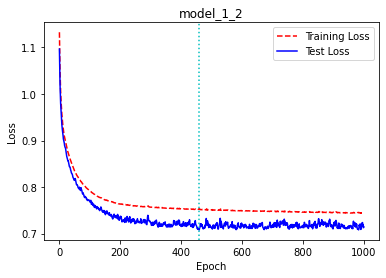

In [92]:
model = tf.keras.Sequential([
      #tf.keras.layers.Flatten(input_shape=(31)),
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(3)
    ])
learning_rate = 0.01
batch_size = 64

loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model.compile(optimizer, loss_fn, metrics)
#plot_model(model, to_file='model_images/model_1_2m.png', show_shapes=True)
checkpoint = ModelCheckpoint('model_12', monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 1000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, 'loss_vs_epochs_images/model_1_2_le.png', 'model_1_2')
save_history('history_model_1_1', model)

In [93]:
print('\nEvaluating:')
(test_loss, test_accuracy) = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_accuracy * 100:>0.1f}%, test loss: {test_loss:>8f}')
print(X_test.shape)
print(X_test[7:8])
print("y")
print(y_test[7:8])
print(get_label(argmax(prediction)))


Evaluating:
7/7 [==============================] - 0s 2ms/step - loss: 0.7142 - accuracy: 0.6425

Test accuracy: 64.2%, test loss: 0.714242
(193, 10)
     Situación Financiera_Buena  Situación Financiera_Mala  \
267                           0                          0   

     Situación Financiera_Media  Vive en Ciudad_No  Vive en Ciudad_Si  \
267                           1                  0                  1   

     Tipo de Instituto_Privado  Tipo de Instituto_Público  \
267                          1                          0   

     Duración de la Clase_0  Duración de la Clase_01-Mar  \
267                       0                            0   

     Duración de la Clase_03-Jun  
267                            1  
y
     Nivel de Adaptación_Alto  Nivel de Adaptación_Bajo  \
267                         0                         0   

     Nivel de Adaptación_Moderado  
267                             1  
Nivel de Adaptación_Moderado


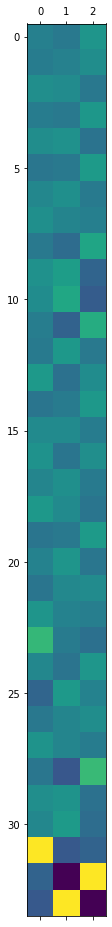

In [83]:
# nivel_de_adaptacion_columns = ["Nivel de Adaptación_Alto","Nivel de Adaptación_Moderado","Nivel de Adaptación_Bajo"]
# dataset_correlation = dataset_one_hot_encoded.corr(method='pearson')[nivel_de_adaptacion_columns]
# plt.matshow(dataset_correlation)
# plt.show()
# # dataset_correlation = dataset_one_hot_encoded.corr(method='pearson')
# # sns.heatmap(dataset_correlation, annot=True)
# plt.show()